In [1]:
from sklearn import   datasets, linear_model, metrics
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn import model_selection
import pandas as pd
from math import sqrt
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [2]:
data = pd.read_csv('data.txt', sep ='\t')
data.shape

(61, 4)

In [3]:
print(data["mortality"].std(ddof=1) )
print( data["mortality"].mean() )

187.6687539314571
1524.1475409836066


In [4]:
print ("data mortality mean auc 95%% confidence interval", _tconfint_generic(data["mortality"].mean(), 
                                                                  data["mortality"].std(ddof=1)/sqrt(61), 60, 
                                                                  0.05, 'two-sided') )

data mortality mean auc 95%% confidence interval (1476.0833413552848, 1572.2117406119285)


In [5]:
data[data["location"]=="South"].shape

(26, 4)

In [6]:
print ("data mortality North mean auc 95%% confidence interval",  _tconfint_generic(data[data["location"]=="North"]["mortality"].mean(), 
                                                                  data[data["location"]=="North"]["mortality"].std(ddof=1)/sqrt(35), 34, 
                                                                  0.05, 'two-sided') )

data mortality North mean auc 95%% confidence interval (1586.5605251961385, 1680.6394748038613)


In [7]:
print ("data mortality South  mean auc 95%% confidence interval",_tconfint_generic(data[data["location"]=="South"]["mortality"].mean(), 
                                                                  data[data["location"]=="South"]["mortality"].std(ddof=1)/sqrt(26), 25, 
                                                                  0.05, 'two-sided') )

data mortality South  mean auc 95%% confidence interval (1320.1517462936238, 1433.463638321761)


In [8]:
print ("data hardness South  mean auc 95%% confidence interval", _tconfint_generic(data[data["location"]=="South"]["hardness"].mean(), 
                                                                  data[data["location"]=="South"]["hardness"].std(ddof=1)/sqrt(26), 25,
                                                                  0.05, 'two-sided') )

data hardness South  mean auc 95%% confidence interval (53.467198692036106, 86.07126284642544)


In [9]:
print ("data hardness  North mean auc 95%% confidence interval", _tconfint_generic(data[data["location"]=="North"]["hardness"].mean(), 
                                                                  data[data["location"]=="North"]["hardness"].std(ddof=1)/sqrt(35), 34,
                                                                  0.05, 'two-sided') )

data hardness  North mean auc 95%% confidence interval (21.42248728572426, 39.37751271427574)


In [10]:
import scipy.stats 

print( scipy.stats.norm.ppf(0.05/2)**2 * 100 )

384.1458820694127


In [11]:

population = np.zeros(50)
population[2] = 1

In [12]:
population.mean()

0.02

In [13]:
from statsmodels.stats.proportion import proportion_confint 


In [14]:
normal_interval = proportion_confint(sum(population), len(population), method = 'normal')

In [15]:
print ('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]) )

normal_interval [0.000000, 0.058805] with width 0.058805


In [16]:
wilson_interval = proportion_confint(sum(population), len(population), method = 'wilson')

In [17]:
print( 'normal_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1], 
                                                  wilson_interval[1] - wilson_interval[0]) )

normal_interval [0.003539, 0.104954] with width 0.101415


In [18]:
from scipy.stats import norm

def my_proportion_confint(count, nobs, alpha=0.05, method='normal'):
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

In [19]:
my_proportion_confint(1, 50)

(-0.018805307081790987, 0.05880530708179099)

In [20]:
from statsmodels.stats.proportion import samplesize_confint_proportion

n_samples = int(np.ceil(samplesize_confint_proportion(0.02, 0.01)))
n_samples

753

In [21]:
import matplotlib.pyplot as plt

values_p = np.linspace(0, 1, 1500)
n_samples = []
plt.figure(figsize=(14, 8))
for i in values_p:
    k = int(np.ceil(samplesize_confint_proportion(i, 0.01))   )
    n_samples.append(k)
    plt.loglog(i,k, "." )
    
print(max(n_samples))


/home/kamilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  if __name__ == '__main__':


9604


In [22]:
from scipy.stats import norm

norm.ppf(0.997+0.003/2)

2.9677379253417717

In [23]:
import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

In [24]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    print(p1, p2)
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [25]:
104/11037 - 189/11034

-0.0077060239760047815

In [26]:
alpha = 0.05
z = scipy.stats.norm.ppf(1 - alpha / 2.)   
p1 = 104/11037
p2 = 189/11034

left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ 11037 + p2 * (1 - p2)/ 11034)
right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ 11037 + p2 * (1 - p2)/ 11034)

In [27]:


print ("confidence interval: [%f, %f]"  % (left_boundary, right_boundary  ) )

confidence interval: [-0.010724, -0.004688]


In [28]:
189/(11034-189)/ (104/(11037-104) )

1.8320539419087138

In [29]:
aspirin = np.zeros(11037)
aspirin[:104] = np.ones(104)
placebo = np.zeros(11034)
placebo[:189] = np.ones(189)
aspirin.mean()

0.009422850412249705

In [30]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [31]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [32]:
np.random.seed(0)

asp_scores = map(np.mean, get_bootstrap_samples(aspirin, 1000))
placebo_scores = map(np.mean, get_bootstrap_samples(placebo, 1000))

In [33]:
delta_median_scores = map(lambda x: float( x[1] /(1-x[1]) / (x[0]) / (1-x[0])   ), zip(asp_scores ,placebo_scores))
values = []

for i in delta_median_scores :
    print(i)
    values.append(float(i) )
#for i in range(1000):
    #values.append( (placebo_scores[i]/(1-placebo_scores[i] )) /(asp_scores[i]/(1-asp_scores[i] ))   )

1.693944731219517
1.801435887331258
2.000530959077185
2.141302200360265
1.7281859740087349
1.6427675887533117
1.8289629067176878
2.0966582389574056
1.5814128814586823
1.9092313549319946
1.5165221371903075
1.6921858972876422
1.4303994727098308
2.097535031052688
2.2764424624114348
1.7018493254135885
1.995626764439147
1.7753637384214018
1.6768146840347142
1.5765346329503238
1.6647728094785614
1.7828894305038734
1.795684822200675
1.9696390058252389
2.0742531559956205
1.8775918540376446
1.677330205295305
1.834314823337919
1.6705430696808414
1.6332212184517714
1.7833994279084542
2.1923812510489613
1.6606278895898667
1.9181765842536787
1.9885526849486546
1.6672407990024103
1.8293662479855233
2.073926370486897
1.8495642918745403
1.519759490896647
2.0987355984890956
1.6437113399798935
1.7949488970573906
2.0422740412640112
1.9256340441734725
1.8783875421018499
1.8284655302357737
1.6705500582756563
1.5665414707088905
1.7197851634247945
1.6603184297229883
2.108416729612301
2.0781701526262335
2.150

In [34]:
print("95% confidence interval for the difference between medians",  stat_intervals( values, 0.05) )

95% confidence interval for the difference between medians [1.4776098  2.38149064]


In [35]:
values

[1.693944731219517,
 1.801435887331258,
 2.000530959077185,
 2.141302200360265,
 1.7281859740087349,
 1.6427675887533117,
 1.8289629067176878,
 2.0966582389574056,
 1.5814128814586823,
 1.9092313549319946,
 1.5165221371903075,
 1.6921858972876422,
 1.4303994727098308,
 2.097535031052688,
 2.2764424624114348,
 1.7018493254135885,
 1.995626764439147,
 1.7753637384214018,
 1.6768146840347142,
 1.5765346329503238,
 1.6647728094785614,
 1.7828894305038734,
 1.795684822200675,
 1.9696390058252389,
 2.0742531559956205,
 1.8775918540376446,
 1.677330205295305,
 1.834314823337919,
 1.6705430696808414,
 1.6332212184517714,
 1.7833994279084542,
 2.1923812510489613,
 1.6606278895898667,
 1.9181765842536787,
 1.9885526849486546,
 1.6672407990024103,
 1.8293662479855233,
 2.073926370486897,
 1.8495642918745403,
 1.519759490896647,
 2.0987355984890956,
 1.6437113399798935,
 1.7949488970573906,
 2.0422740412640112,
 1.9256340441734725,
 1.8783875421018499,
 1.8284655302357737,
 1.6705500582756563,
 1.

In [36]:
for i in delta_median_scores:
    print(i)

In [37]:
from scipy import stats

stats.binom_test(67, 100, 0.75, alternative = 'two-sided')

0.08222258891386608

In [38]:
stats.binom_test(22, 50, 0.75, alternative = 'less')

2.9168262414030864e-06

In [39]:
data = pd.read_csv('pines.txt', sep ='\t')


In [40]:
xbins = np.linspace(0, 200, 6)
ybins  = np.linspace(0, 200, 6)

In [41]:
ret = stats.binned_statistic_2d(data["sn"], data["we"], None, 'count', bins=[xbins,ybins])
ret.statistic

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

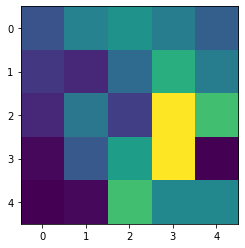

In [42]:
plt.imshow(ret.statistic)

In [43]:
584/25

23.36

In [44]:
pines = np.array(ret.statistic.reshape(1, 25)[0], dtype = int  )

In [45]:
pines

array([18, 26, 29, 25, 20, 14, 12, 22, 34, 25, 12, 24, 15, 50, 37,  8, 19,
       31, 50,  7,  7,  8, 37, 27, 27])

In [46]:
expected_frequences = np.empty(25)
expected_frequences.fill(584/25)
expected_frequences

array([23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36,
       23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36,
       23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36])

In [47]:
np.random.uniform(-1,0,10)

array([-0.87599126, -0.48995082, -0.08627515, -0.14777805, -0.39720222,
       -0.19129197, -0.24969241, -0.09435138, -0.70259355, -0.04325006])

In [48]:
stats.chisquare(pines, expected_frequences, ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)

In [49]:
exp = np.zeros(34)
exp[:10] = np.ones(10)
cont = np.zeros(16)
cont[:4] = np.ones(4)

def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)


def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))


def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [50]:
m1 = np.zeros(200000)

In [51]:
print("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(exp, cont),  "greater" ))

p-value: 0.372930


In [52]:
data = pd.read_csv('banknotes.txt', sep ='\t')
data.head

<bound method NDFrame.head of         X1     X2     X3    X4    X5     X6  real
0    214.8  131.0  131.1   9.0   9.7  141.0     1
1    214.6  129.7  129.7   8.1   9.5  141.7     1
2    214.8  129.7  129.7   8.7   9.6  142.2     1
3    214.8  129.7  129.6   7.5  10.4  142.0     1
4    215.0  129.6  129.7  10.4   7.7  141.8     1
5    215.7  130.8  130.5   9.0  10.1  141.4     1
6    215.5  129.5  129.7   7.9   9.6  141.6     1
7    214.5  129.6  129.2   7.2  10.7  141.7     1
8    214.9  129.4  129.7   8.2  11.0  141.9     1
9    215.2  130.4  130.3   9.2  10.0  140.7     1
10   215.3  130.4  130.3   7.9  11.7  141.8     1
11   215.1  129.5  129.6   7.7  10.5  142.2     1
12   215.2  130.8  129.6   7.9  10.8  141.4     1
13   214.7  129.7  129.7   7.7  10.9  141.7     1
14   215.1  129.9  129.7   7.7  10.8  141.8     1
15   214.5  129.8  129.8   9.3   8.5  141.6     1
16   214.6  129.9  130.1   8.2   9.8  141.7     1
17   215.0  129.9  129.7   9.0   9.0  141.9     1
18   215.2  129.6  1

In [53]:
from sklearn.model_selection import train_test_split

a_train, a_test, b_train, b_test  =train_test_split(data[['X1',     'X2',     'X3',    'X4',    'X5',     'X6']], data["real"], test_size=50, random_state=1)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
clf = LogisticRegression().fit(a_train[["X1", "X2", "X3"]], b_train)
clf2 = LogisticRegression().fit(a_train[["X4", "X5", "X6"]], b_train)

/home/kamilla/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kamilla/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
ans1 = clf.predict(a_test[["X1", "X2", "X3"]])
ans2 = clf2.predict(a_test[["X4", "X5", "X6"]])

In [57]:
bools1 = ans1!= b_test
bools2 = ans2!=b_test
sum(bools2)/len(bools2)

0.02

In [58]:
fr1 = clf.score(a_test[["X1", "X2", "X3"]], b_test)

In [59]:
fr2 = clf2.score(a_test[["X4", "X5", "X6"]], b_test)

In [60]:
fr1

0.8

In [61]:
fr2

0.98

In [62]:
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2) )
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    print(f)
    print(g)
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_rel(sample1, sample2):
    sample =list(zip(sample1, sample2) )
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    print(f)
    print(g)
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )


def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [63]:
print("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_rel( bools2, bools1) ) )

1
10
p-value: 0.003297


In [64]:
print("95%% confidence interval for a difference between proportions: [%f, %f]" \
      % proportions_diff_confint_rel( bools1, bools2 ) )

10
1
95% confidence interval for a difference between proportions: [0.059945, 0.300055]


In [65]:
theory = np.random.normal(525, 100, 200000)

In [66]:
practical = np.random.normal(525, 100, 200000)

In [67]:
mu = 541.5
mu0 = 525
sigma = 100
n= 100
z = (mu- mu0) / (sigma/(n**0.5))

print (1 - scipy.stats.norm.cdf(z)  )

0.0494714680336481


In [68]:
import pandas as pd
frame = pd.read_csv("banknotes.txt", sep="\t", header=0)
frame.head()

# Отделите 50 случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1).
#%%
from sklearn.model_selection import train_test_split
y = frame["real"].as_matrix()
x = frame.drop("real", axis=1).as_matrix()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=50, random_state=1)

# На оставшихся 150 настройте два классификатора поддельности банкнот:
#  1. логистическая регрессия по признакам X1,X2,X3;
#  2. логистическая регрессия по признакам X4,X5,X6.
#%%
from sklearn.linear_model import LogisticRegression
x_train_1_3 = x_train[np.ix_(range(0, x_train.shape[0]), [0,1,2])]
x_test_1_3 = x_test[np.ix_(range(0, x_test.shape[0]), [0,1,2])]

x_train_4_6 = x_train[np.ix_(range(0, x_train.shape[0]), [3,4,5])]
x_test_4_6 = x_test[np.ix_(range(0, x_test.shape[0]), [3,4,5])]

regression_1_3 = LogisticRegression().fit(x_train_1_3, y_train)
regression_4_6 = LogisticRegression().fit(x_train_4_6, y_train)

# Каждым из классификаторов сделайте предсказания меток классов на тестовой выборке. Одинаковы ли доли ошибочных предсказаний двух классификаторов?
#%%
#predictions_1_3 = map(lambda x_row: regression_1_3.predict(x_row.reshape(1,-1))[0], x_test_1_3)
#predictions_4_6 = map(lambda x_row: regression_4_6.predict(x_row.reshape(1,-1))[0], x_test_4_6)
predictions_1_3 = regression_1_3.predict(x_test_1_3)
predictions_4_6 = regression_4_6.predict(x_test_4_6)
#predictions_res_1_3 = map(lambda (pred, val): 1 if pred == val else 0, zip(predictions_1_3, y_test))
#predictions_res_4_6 = map(lambda (pred, val): 1 if pred == val else 0, zip(predictions_4_6, y_test))

predictions_res_1_3 = predictions_1_3== y_test
predictions_res_4_6 = predictions_4_6== y_test
print("False predictions portion 1-3: %f" % (1-float(sum(predictions_res_1_3))/float(len(predictions_res_1_3))) )
print("False predictions portion 4-6: %f" % (1-float(sum(predictions_res_4_6))/float(len(predictions_res_4_6))) )

# Проверьте гипотезу, вычислите достигаемый уровень значимости. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).
#%%
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2)
    sample = zip(sample1, sample2)
    n = len(sample1)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    #f = sum(sample1==sample2)
    print(f)
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_rel(sample1, sample2):
    sample = zip(sample1, sample2)
    n = len(sample1)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    print(f)
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )
#%%
pvalue = proportions_diff_z_test(proportions_diff_z_stat_rel(predictions_res_1_3, predictions_res_4_6))
print("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_rel(predictions_res_1_3, predictions_res_4_6)) )

False predictions portion 1-3: 0.200000
False predictions portion 4-6: 0.020000
1
1
p-value: 0.312422


/home/kamilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/kamilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/home/kamilla/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kamilla/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [69]:
 proportions_diff_z_test(proportions_diff_z_stat_rel(predictions_res_4_6, predictions_res_1_3))
    

10


0.00040695201744500586

In [70]:
cinfidence_int_rel = proportions_diff_confint_rel(predictions_res_4_6, predictions_res_1_3)
print("95%% confidence interval for a difference between predictions: [%.5f, %.5f]" \
      % (np.round(cinfidence_int_rel[0],4), np.round(cinfidence_int_rel[1], 4)) )

10
95% confidence interval for a difference between predictions: [0.08910, 0.31090]


In [71]:
data = np.array([49,58,75,110,112,132,151,276,281,362])

In [72]:

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint


#sign_test(data, 200)
m0 = 200
stats.wilcoxon(data- m0)

WilcoxonResult(statistic=17.0, pvalue=0.2845026979112075)

In [73]:
data1 = [22,22,15,13,19,19,18,20,21,13,13,15]
data2 = [ 17,18,18,15,12,4,14,15,10 ]
sum(data2)/len(data2)

13.666666666666666

In [74]:


from scipy import stats

stats.mannwhitneyu(data1, data2, alternative = "greater")

MannwhitneyuResult(statistic=81.0, pvalue=0.02900499272087373)

In [75]:
chall = weight_data = pd.read_csv('challenger.txt', sep = '\t', header = 0)

In [76]:
chall

,Unnamed: 0,Temperature,Incident
0,Apr12.81,18.9,0
1,Nov12.81,21.1,1
2,Mar22.82,20.6,0
3,Nov11.82,20.0,0
4,Apr04.83,19.4,0
5,Jun18.83,22.2,0
6,Aug30.83,22.8,0
7,Nov28.83,21.1,0
8,Feb03.84,13.9,1
9,Apr06.84,17.2,1


In [77]:
damage_yes = np.array( chall[chall["Incident"]==1]["Temperature"] )
damage_no = np.array(  chall[chall["Incident"]==0]["Temperature"]  )

In [78]:
damage_yes

array([21.1, 13.9, 17.2, 21.1, 11.7, 23.9, 14.4])

In [79]:
np.random.seed(0)

no = np.array( list(map(np.mean, get_bootstrap_samples(damage_no, 1000)) ) )

yes = np.array( list(map(np.mean, get_bootstrap_samples(damage_yes , 1000)) ) )

In [80]:
print('95%% confidence interval for the mean: [%f, %f]' % zconfint(-no+yes) )

95% confidence interval for the mean: [-4.739232, -4.526256]


In [81]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [82]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2) )
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [83]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), list(filter(lambda i: i not in index, list(range(n))) ) ) \
                    for index in itertools.combinations(list(range(n)), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [84]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [85]:
np.random.seed(0)

permutation_test(damage_yes, damage_no, max_permutations = 10000)

0.0057

In [86]:
data = pd.read_csv('data.txt', sep ='\t')
data_corr2 = data[["mortality", "hardness"]].corr( 'spearman')

data_corr2

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [ ]:
data_south = data[data["location"]=="South"][["mortality", "hardness"]].corr( )
data_north = data[data["location"]=="North"][["mortality", "hardness"]].corr( )
data_south 

In [ ]:
data_north

In [ ]:
a=203
b=239
c=718
d=515
(a*d-b*c)/((a+b)*(c+d)*(b+d)*(b+d))**0.5

In [ ]:
scipy.stats.chi2_contingency([[a,b], [c,d]])

In [ ]:
women = 203/(203+718)
men = 239/(239+515)

In [ ]:
proportions_confint_diff_ind( [women], [men]   )

In [ ]:
proportions_confint_diff_ind( [men], [women]   )

In [ ]:
w = np.zeros(203+718)
w[:203] = np.ones(203)
m = np.zeros(239+515)
m[:239] = np.ones(239)
proportions_diff_z_test(proportions_diff_z_stat_ind( m, w  ))

In [ ]:
proportions_confint_diff_ind( m, w   )

In [ ]:
women

In [ ]:
obs = np.array([[197,111,33], [382,685,331 ],  [110,342,333] ])

In [ ]:
g, p, dof, expctd =scipy.stats.chi2_contingency(obs)

In [ ]:
(g / (2524*2) ) **0.5

In [ ]:
obs.sum()

In [88]:
aucs =   pd.read_csv('AUCs.txt', sep = '\t', header = 0)

In [89]:
aucs

,Unnamed: 0,C4.5,C4.5+m,C4.5+cf,C4.5+m+cf
0,adult (sample),0.763,0.768,0.771,0.798
1,breast cancer,0.599,0.591,0.590,0.569
2,breast cancer wisconsin,0.954,0.971,0.968,0.967
3,cmc,0.628,0.661,0.654,0.657
4,ionosphere,0.882,0.888,0.886,0.898
5,iris,0.936,0.931,0.916,0.931
6,liver disorders,0.661,0.668,0.609,0.685
7,lung cancer,0.583,0.583,0.563,0.625
8,lymphography,0.775,0.838,0.866,0.875
9,mushroom,1.000,1.000,1.000,1.000


In [90]:
stats.wilcoxon(aucs["C4.5"], aucs["C4.5+m"])

WilcoxonResult(statistic=6.5, pvalue=0.01075713311978963)

In [91]:
stats.wilcoxon(aucs["C4.5"], aucs["C4.5+cf"])

WilcoxonResult(statistic=43.0, pvalue=0.861262330095348)

In [92]:
stats.wilcoxon(aucs["C4.5"], aucs["C4.5+m+cf"])

WilcoxonResult(statistic=11.0, pvalue=0.015906444101703374)

In [93]:
stats.wilcoxon(aucs["C4.5+m"], aucs["C4.5+cf"])

WilcoxonResult(statistic=17.0, pvalue=0.046332729793395394)

In [94]:
stats.wilcoxon(aucs["C4.5+m"], aucs["C4.5+m+cf"])

WilcoxonResult(statistic=22.0, pvalue=0.3278256758446406)

In [95]:
stats.wilcoxon(aucs["C4.5+cf"], aucs["C4.5+m+cf"])

WilcoxonResult(statistic=10.0, pvalue=0.022909099354356588)

In [96]:

from scipy.stats import pearsonr
from statsmodels.sandbox.stats.multicomp import multipletests 

In [108]:
%%time 
corr_data = []
aucs = aucs[["C4.5", "C4.5+m","C4.5+cf", "C4.5+m+cf"]]
for i, lhs_column in list(enumerate(aucs.columns) ):
    for j, rhs_column in list(enumerate(aucs.columns)):
        if i >= j:
            continue
        
        #corr, p = pearsonr(aucs[lhs_column], aucs[rhs_column])
        corr, p =  stats.wilcoxon(aucs[lhs_column], aucs[rhs_column])
        corr_data.append([lhs_column, rhs_column, corr, p])

CPU times: user 8.03 ms, sys: 213 µs, total: 8.24 ms
Wall time: 8.36 ms


In [109]:
corr_data


[['C4.5', 'C4.5+m', 6.5, 0.01075713311978963],
 ['C4.5', 'C4.5+cf', 43.0, 0.861262330095348],
 ['C4.5', 'C4.5+m+cf', 11.0, 0.015906444101703374],
 ['C4.5+m', 'C4.5+cf', 17.0, 0.046332729793395394],
 ['C4.5+m', 'C4.5+m+cf', 22.0, 0.3278256758446406],
 ['C4.5+cf', 'C4.5+m+cf', 10.0, 0.022909099354356588]]

In [110]:
correlation = pd.DataFrame.from_records(corr_data)
correlation.columns = ['A', 'B', 'corr', 'p']

In [111]:
correlation

,A,B,corr,p
0,C4.5,C4.5+m,6.5,0.010757
1,C4.5,C4.5+cf,43.0,0.861262
2,C4.5,C4.5+m+cf,11.0,0.015906
3,C4.5+m,C4.5+cf,17.0,0.046333
4,C4.5+m,C4.5+m+cf,22.0,0.327826
5,C4.5+cf,C4.5+m+cf,10.0,0.022909


In [112]:
(correlation.p < 0.05).value_counts() # 

True     4
False    2
Name: p, dtype: int64

In [113]:
reject, p_corrected, a1, a2 = multipletests(correlation.p, 
                                            alpha = 0.05, 
                                            method = 'holm') 

In [114]:
correlation['p_corrected'] = p_corrected
correlation['reject'] = reject
correlation

,A,B,corr,p,p_corrected,reject
0,C4.5,C4.5+m,6.5,0.010757,0.064543,False
1,C4.5,C4.5+cf,43.0,0.861262,0.861262,False
2,C4.5,C4.5+m+cf,11.0,0.015906,0.079532,False
3,C4.5+m,C4.5+cf,17.0,0.046333,0.138998,False
4,C4.5+m,C4.5+m+cf,22.0,0.327826,0.655651,False
5,C4.5+cf,C4.5+m+cf,10.0,0.022909,0.091636,False


In [115]:
reject, p_corrected, a1, a2 = multipletests(correlation.p, 
                                            alpha = 0.05, 
                                            method = 'fdr_bh') 

correlation['p_corrected'] = p_corrected
correlation['reject'] = reject
correlation

,A,B,corr,p,p_corrected,reject
0,C4.5,C4.5+m,6.5,0.010757,0.045818,True
1,C4.5,C4.5+cf,43.0,0.861262,0.861262,False
2,C4.5,C4.5+m+cf,11.0,0.015906,0.045818,True
3,C4.5+m,C4.5+cf,17.0,0.046333,0.069499,False
4,C4.5+m,C4.5+m+cf,22.0,0.327826,0.393391,False
5,C4.5+cf,C4.5+m+cf,10.0,0.022909,0.045818,True


In [198]:
data =  pd.read_csv('botswana.tsv', sep = '\t', header = 0)

In [199]:
data["religion"].value_counts()

spirit        1841
other         1080
protestant     993
catholic       447
Name: religion, dtype: int64

In [200]:
data["nevermarr"] = data["agefm"].isnull()

In [201]:
data = data.drop(columns='evermarr')
data

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,NaN,NaN,1,1.0,1.0,1.0,1.0,True
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,False
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,False
3,0,24,12,other,2.0,1.0,0.0,NaN,NaN,1,1.0,1.0,1.0,1.0,True
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,False
5,1,30,5,spirit,5.0,1.0,0.0,24.0,7.0,1,1.0,0.0,0.0,0.0,False
6,3,42,4,other,3.0,1.0,0.0,15.0,11.0,1,1.0,0.0,1.0,0.0,False
7,1,36,7,other,4.0,1.0,1.0,24.0,9.0,1,1.0,0.0,0.0,0.0,False
8,4,37,16,catholic,4.0,1.0,1.0,26.0,17.0,1,1.0,1.0,1.0,1.0,False
9,1,34,5,protestant,4.0,1.0,1.0,18.0,3.0,1,0.0,1.0,0.0,0.0,False


In [202]:
data.loc[data["agefm"].isnull(), "agefm"] =0

In [203]:
data.loc[data["nevermarr"]==True, "heduc" ]=-1
data.head

<bound method NDFrame.head of       ceb  age  educ    religion  idlnchld  knowmeth  usemeth  agefm  heduc  \
0       0   18    10    catholic       4.0       1.0      1.0    0.0   -1.0   
1       2   43    11  protestant       2.0       1.0      1.0   20.0   14.0   
2       0   49     4      spirit       4.0       1.0      0.0   22.0    1.0   
3       0   24    12       other       2.0       1.0      0.0    0.0   -1.0   
4       3   32    13       other       3.0       1.0      1.0   24.0   12.0   
5       1   30     5      spirit       5.0       1.0      0.0   24.0    7.0   
6       3   42     4       other       3.0       1.0      0.0   15.0   11.0   
7       1   36     7       other       4.0       1.0      1.0   24.0    9.0   
8       4   37    16    catholic       4.0       1.0      1.0   26.0   17.0   
9       1   34     5  protestant       4.0       1.0      1.0   18.0    3.0   
10      3   42    15       other       3.0       1.0      1.0   24.0   16.0   
11      3   29     7  

In [204]:
data["heduc"].isnull().value_counts()

False    4238
True      123
Name: heduc, dtype: int64

In [205]:
data["idlnchld_noans"] = data["idlnchld"].isnull()
data.loc[data["idlnchld_noans"]==True, "idlnchld" ]=-1

data["heduc_noans"] = data["heduc"].isnull()
data.loc[data["heduc_noans"]==True, "heduc" ]=-2


data["usemeth_noans"] = data["usemeth"].isnull()
data.loc[data["usemeth_noans"]==True, "usemeth" ]=-1

In [206]:
data =data.dropna()

In [207]:
data

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,True,False,False,False
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,False,False,False,False
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,False,False,False,False
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,True,False,False,False
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,False,False,False,False
5,1,30,5,spirit,5.0,1.0,0.0,24.0,7.0,1,1.0,0.0,0.0,0.0,False,False,False,False
6,3,42,4,other,3.0,1.0,0.0,15.0,11.0,1,1.0,0.0,1.0,0.0,False,False,False,False
7,1,36,7,other,4.0,1.0,1.0,24.0,9.0,1,1.0,0.0,0.0,0.0,False,False,False,False
8,4,37,16,catholic,4.0,1.0,1.0,26.0,17.0,1,1.0,1.0,1.0,1.0,False,False,False,False
9,1,34,5,protestant,4.0,1.0,1.0,18.0,3.0,1,0.0,1.0,0.0,0.0,False,False,False,False


In [208]:
4348*18

78264

In [209]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

In [210]:
m1 = smf.ols('ceb ~ age+ educ + religion + idlnchld +knowmeth + usemeth +'\
                    'agefm + heduc + urban+ electric +radio +tv + bicycle + nevermarr + idlnchld_noans +idlnchld_noans + heduc_noans +usemeth_noans  ', 
             data=data)
fitted = m1.fit()
print(fitted.summary() )

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:21:16   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [190]:
sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1]

1.1452927633437192e-225

In [211]:
data = data.drop(columns=[ 'religion', 'radio','tv'])

In [212]:
m2 = smf.ols('ceb ~ age+ educ  + idlnchld +knowmeth + usemeth +'\
                    'agefm + heduc + urban+ electric  + bicycle + nevermarr + idlnchld_noans +idlnchld_noans + heduc_noans +usemeth_noans  ', 
             data=data)
fitted = m2.fit(cov_type='HC1')
print(fitted.summary() )

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:21:22   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [193]:
sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1]

1.1197458896528959e-228

In [194]:
m1.fit().compare_f_test(m2.fit())

(0.919235778463167, 0.467230554727435, 5.0)

In [196]:
#m3 = smf.ols('ceb ~ age+ educ  + idlnchld +knowmeth +'\
#                    'agefm + heduc + urban+ electric  + bicycle + nevermarr + idlnchld_noans +idlnchld_noans + heduc_noans', 
#             data=data)
#fitted = m3.fit(cov_type='HC1')
#print(fitted.summary() )

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     396.4
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:20:17   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [197]:
m2.fit().compare_f_test(m3.fit())

(92.890582301098, 3.1552009480371243e-40, 2.0)